In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

import logging

logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_fits import *
from xps.xps_bg import *

In [3]:
jtplot.style('grade3', context='talk', grid=False, ticks=True, fscale=1.5)

asf = dict({'C_1s' : 0.296, 'O_1s' : 0.711, 'N_1s' : 0.477, 'Ba_3d' : 7.49,
            'Cu_2p' : 5.321, 'Cl_2p' : 0.891})

In [4]:
# plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['lines.linewidth'] = 4

In [5]:
def plot_xp_regions(experiments : list, regions : list, colors : list = None, ncols : int = 3):
    """Subplots all regions of a list of experiments (unnormalised)"""
    rows = int(np.ceil(len(regions) / ncols))
    
    fig, ax = plt.subplots(rows, ncols, figsize=(16, 8))
    for i,r in enumerate(regions):
        for c,xp in enumerate(experiments):
            j, k = i//ncols, i%ncols            
#             if i == len(regions) - 1:   # Set labels from last region
#                 li = plot_region(xp, r, ax=ax[j][k], lb=xp.name)
#                 if len(colors) > 0: li.set_color(colors[c])
#                 ax[j][k].set_title('Au_4d')
#                 ax[j][k].get_legend().remove()
#             else:
            li = plot_region(xp, r, ax=ax[j][k], lb=xp.name)
            if len(colors) > 0: li.set_color(colors[c])
            ax[j][k].set_title(r)            
            cosmetics_plot(ax=ax[j][k], leg = False);
#             ax[j][k].get_legend().remove()
            
        if len(experiments)%2 == 0:
            ax[j][k].invert_xaxis()
    plt.tight_layout()
#     fig.legend()

# Analysis injections 1000 mbar
100, 200 & 400 pulses

At $t_{on}$ = 50 ms and C = 1µM

## Read processed experiments

In [6]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/**/*.uxy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []

for f in files:
    if ('/proc' in f):
        files_new.append(f)
files = files_new
files

['/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/18062020_Cu_clean.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/19062020_Cu_FBI_100pulses_1e-4M.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/20200628_Cu_FBI_100pulses_1e-4M_BaClO42_1e-4M.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/20200702_Cu_FBI_200pulses_1e-4M.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/20200706_Cu_FBI_200pulses_1e-4M_BaClO42_1e-4M_200pulses.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/20200716_Cu_FBI_400pulses_1e-4M.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/20200814_Cu_FBI_ester_200pulses_1e-4M.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/20200814_Cu_FBI_ester_200pulses_1e-4M_BaClO42_45min.uxy']

In [7]:
proc_exps = []
colors = ['b', 'g', 'r', 'y', 'purple', 'k', 'magenta', 'c', 'm']
for f in files:
    proc_exps.append(read_processed_xp(f))
    
for xp, c in zip(proc_exps,colors):
    xp.color = c

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/18062020_Cu_clean.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/19062020_Cu_FBI_100pulses_1e-4M.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/20200628_Cu_FBI_100pulses_1e-4M_BaClO42_1e-4M.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/20200702_Cu_FBI_200pulses_1e-4M.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/20200706_Cu_FBI_200pulses_1e-4M_BaClO42_1e-4M_200pulses.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/proc/20200716_Cu_FBI_400pulses_1e-4M.uxy.ft', returning empty fit dict
[Err

## Show individual plots

In [8]:
regions = proc_exps[0].dfx.columns.levels[0].values
regions= ['N_1s', 'C_1s', 'O_1s', 'Ba_3d', 'Cl_2p', 'Cu_2p']

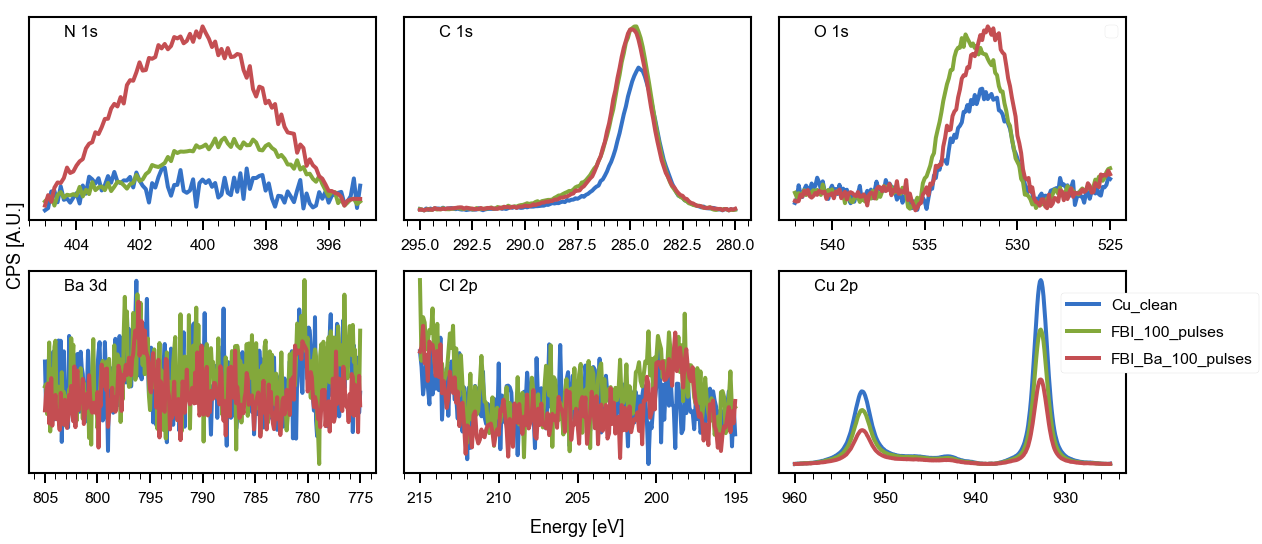

In [9]:
plot_xp_regions(proc_exps[:3], regions, ncols=3);

### Only FBI injections

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9f055b710>,
      dtype=object)

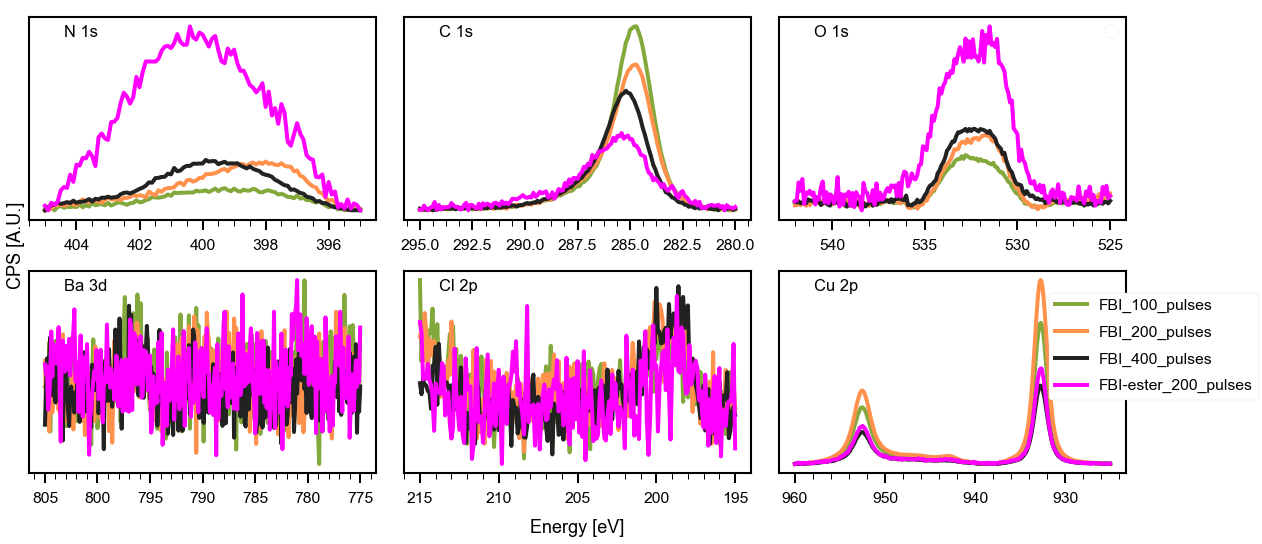

In [10]:
# colors = ['g','y', 'purple', 'magenta']
plot_xp_regions([proc_exps[1]]+[proc_exps[3]] + [proc_exps[5]] + [proc_exps[6]], regions, ncols=3)

### Only FBI-Ba

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9f0d3f898>,
      dtype=object)

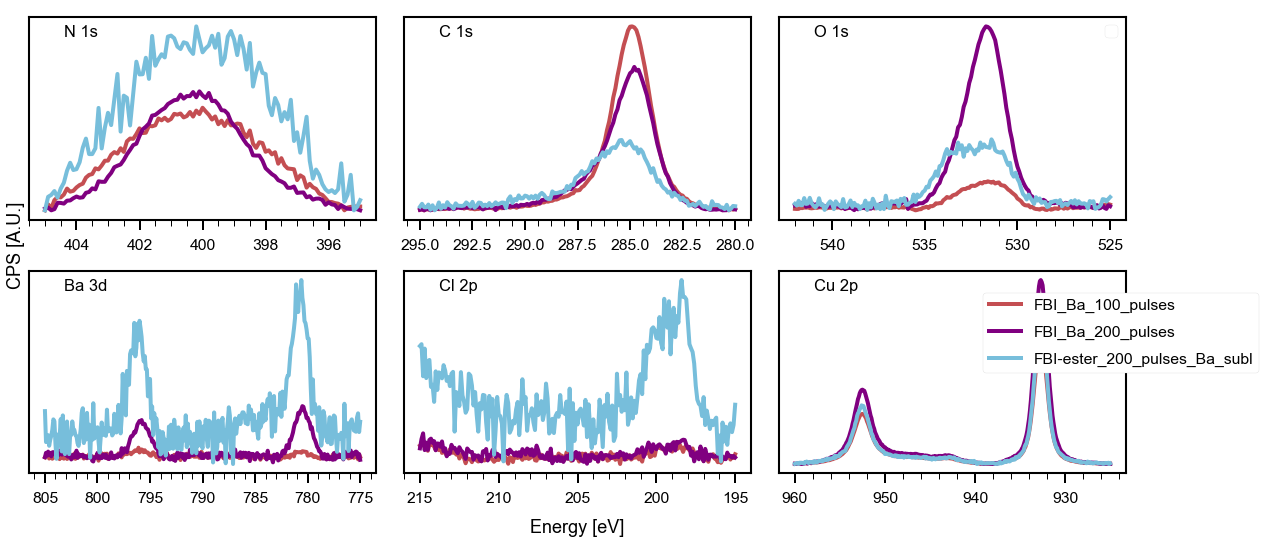

In [11]:
colors = ['r','k', 'c']
plot_xp_regions([proc_exps[2]]+[proc_exps[4]]+[proc_exps[7]] , regions, colors, ncols=3)

## Integrate areas 

In [12]:
regions

['N_1s', 'C_1s', 'O_1s', 'Ba_3d', 'Cl_2p', 'Cu_2p']

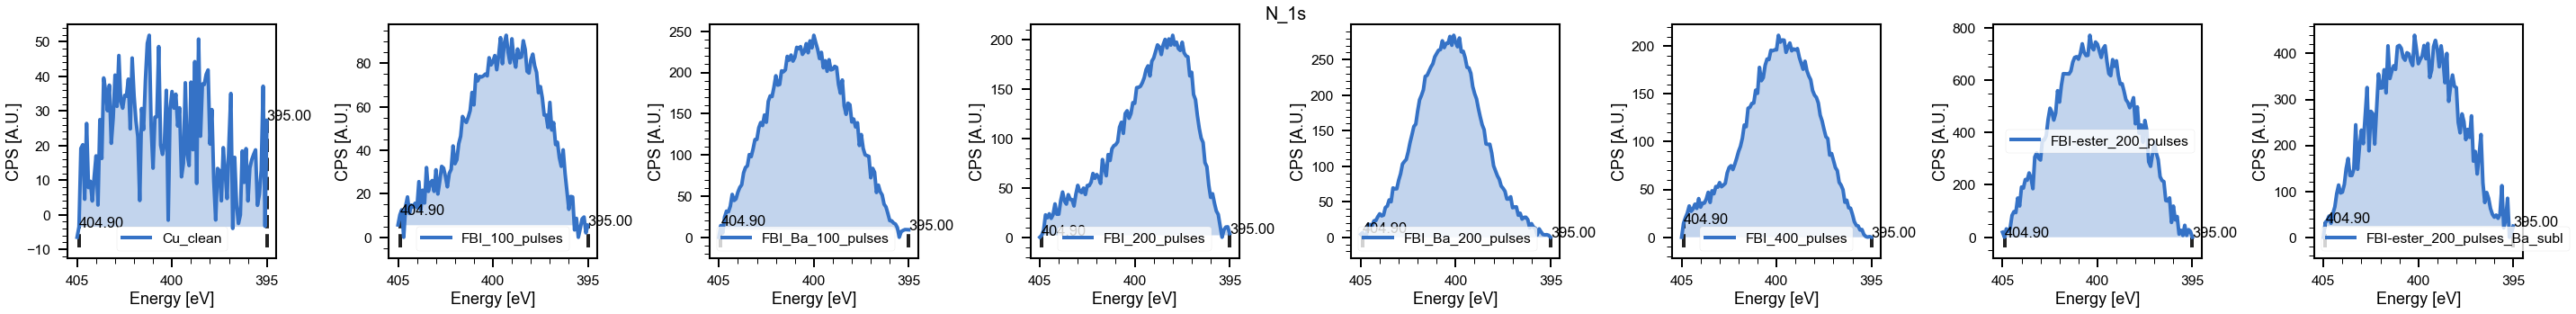

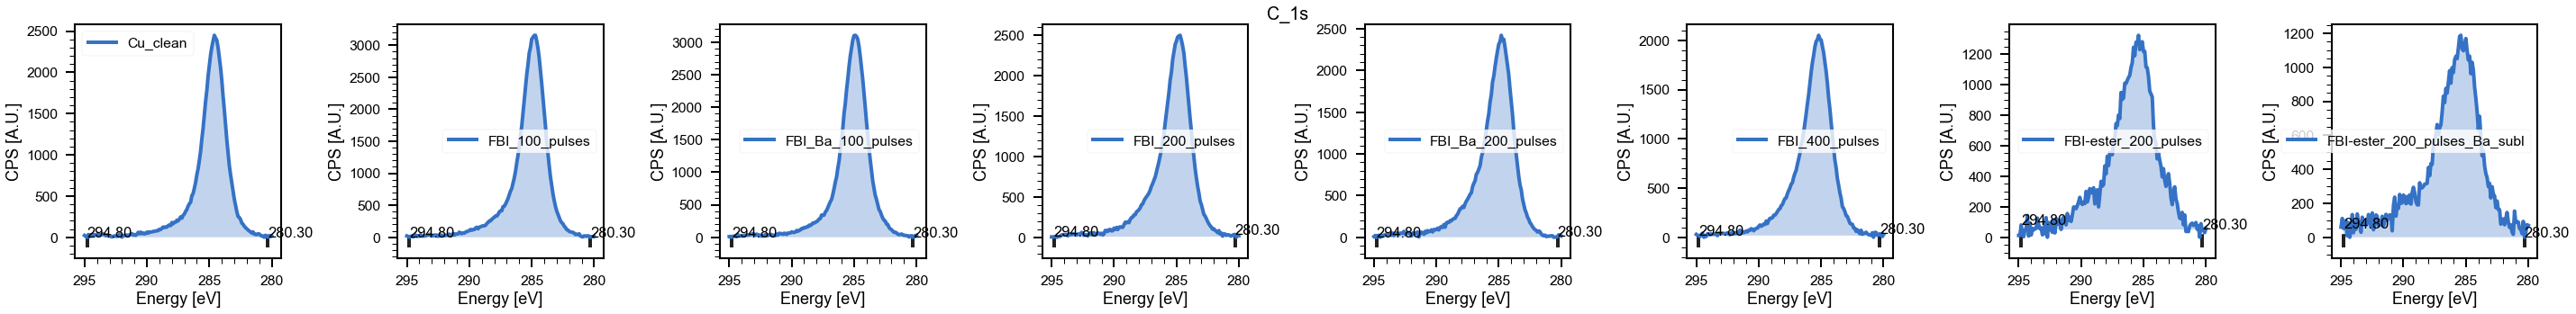

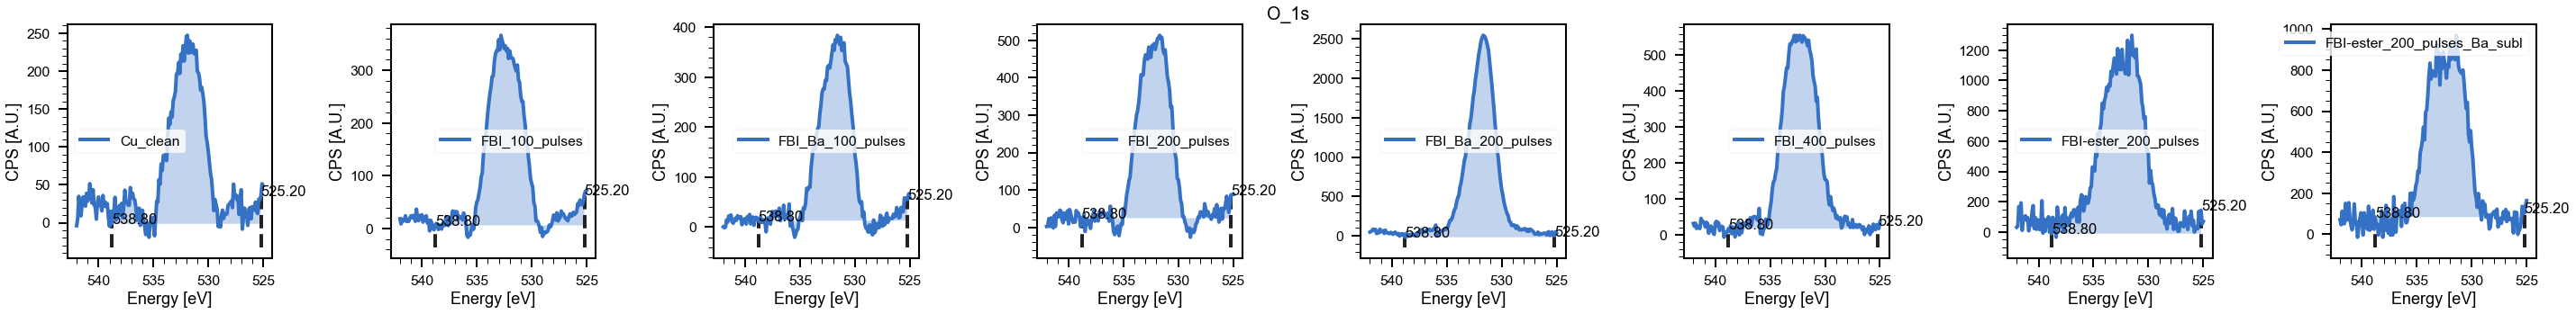

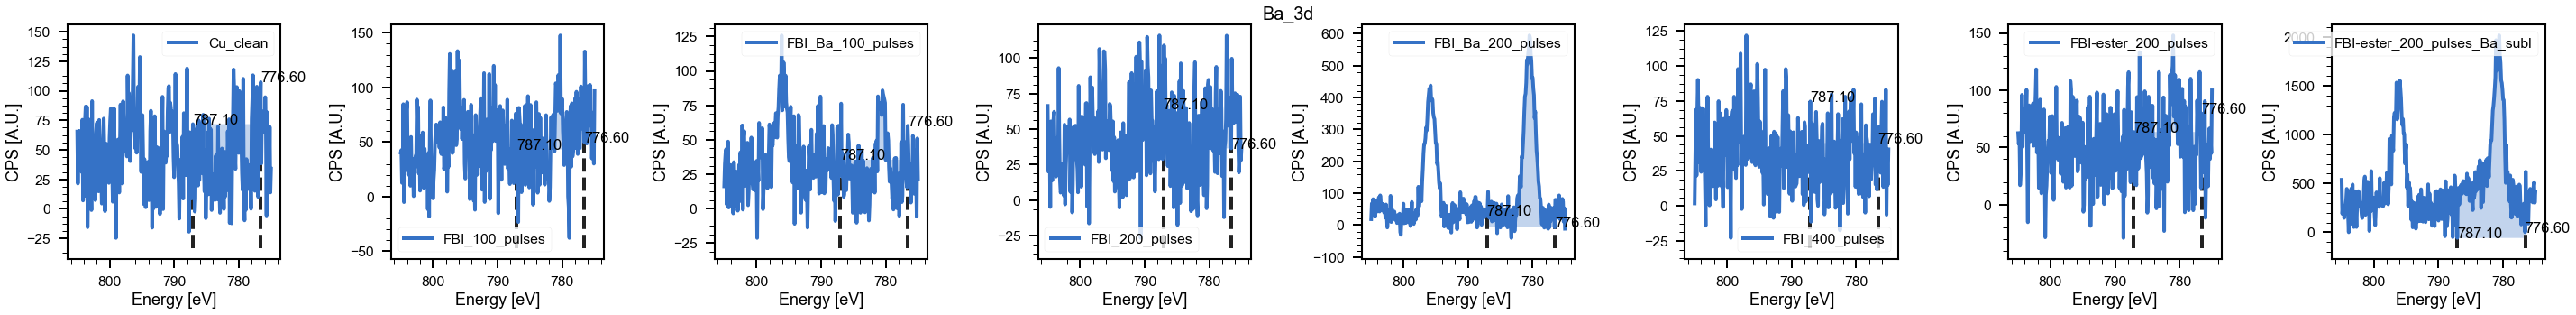

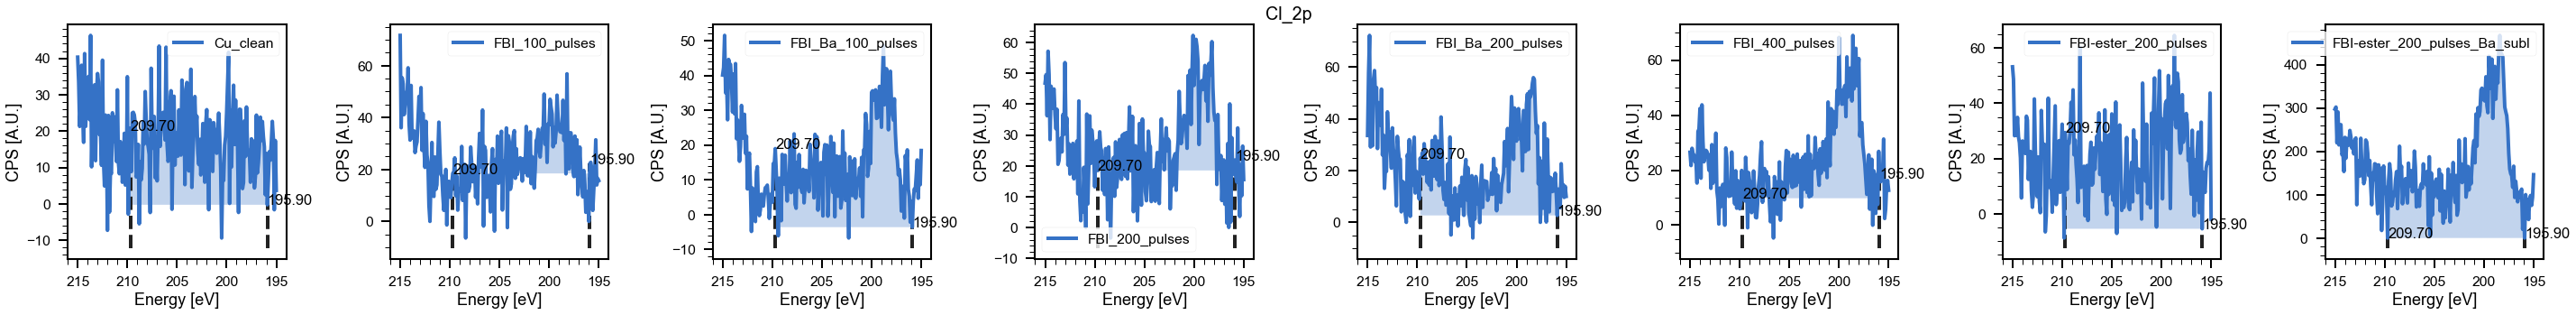

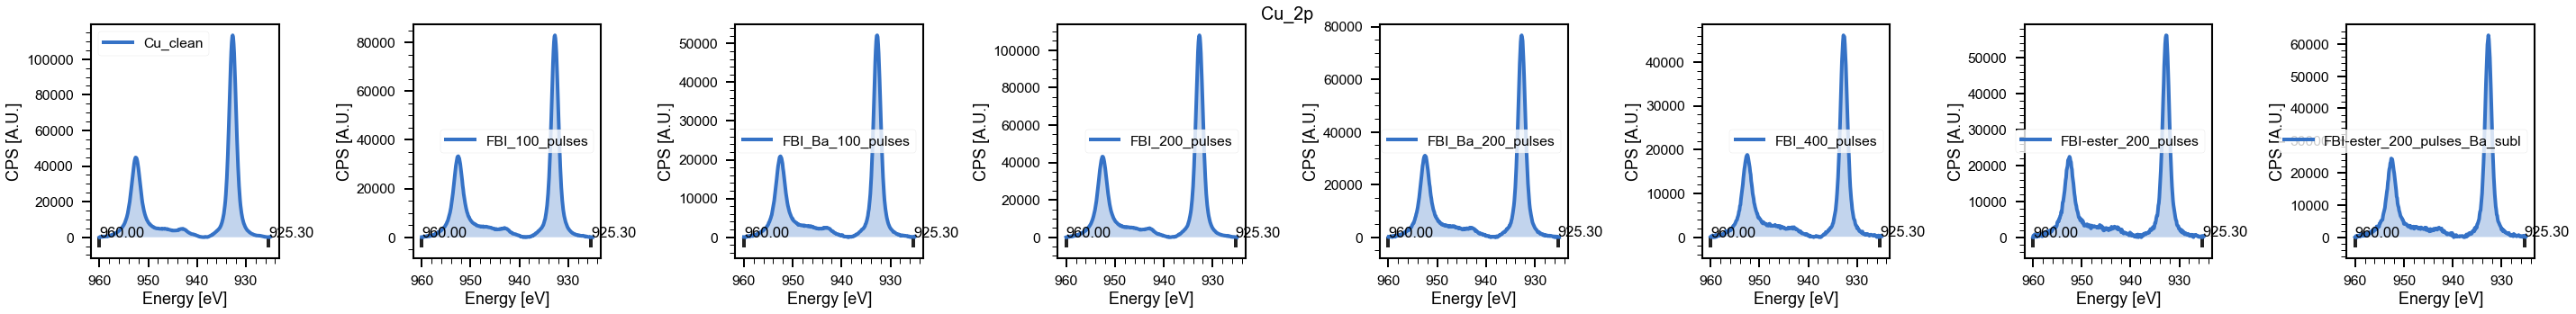

In [13]:
for r in regions:
    integrateRegions(proc_exps, region=r, asf=asf)

## Stoichiometry

In [14]:
area_fbi = {'N_1s' : 3, 'C_1s': 31, 'O_1s': 5, 'Ba_3d': 1e-10, 'Cl_2p': 1e-10}
stofbi = XPS_experiment(name= 'Stoichiometry FBI', area=area_fbi)

area_fbiba = {'N_1s' : 3, 'C_1s': 31, 'O_1s': 13, 'Ba_3d': 1, 'Cl_2p': 2, 'FBI_0' : 1}
stofbiba = XPS_experiment(name= 'Stoichiometry FBI:Ba(ClO4)2', area=area_fbiba)

nf = 4.5
area_4fbiba = {'N_1s' : 3 * nf, 'C_1s': 31 * nf, 'O_1s': 5 * nf + 8, 'Ba_3d': 1, 'Cl_2p': 2, 'FBI_0' : nf}
sto4fbiba = XPS_experiment(name= 'Stoichiometry %.1f FBI: Ba(ClO4)2' %nf, area=area_4fbiba)


area_fbiester = {'N_1s' : 3, 'C_1s': 32, 'O_1s': 7, 'Ba_3d': 1e-10, 'Cl_2p': 2e-10}
stofbiester = XPS_experiment(name= 'Stoichiometry FBI-ester', area=area_fbiester)

area_fbieba = {'N_1s' : 3, 'C_1s': 32, 'O_1s': 7 + 8, 'Ba_3d': 1, 'Cl_2p': 2}
stofbieba = XPS_experiment(name= 'Stoichiometry FBI-ester : Ba(ClO4)2', area=area_fbieba)

### FBI only

In [15]:
fexps = [proc_exps[i] for i in [1, 3, 5]]
num, denom = (('N_1s', 'C_1s', 'C_1s'), ('O_1s', 'N_1s', 'O_1s'))

display_stoichiometry(fexps + [stofbi], num, denom)

In [108]:
num, denom = (('N_1s', 'C_1s', 'C_1s', 'Cl_2p', 'Ba_3d'), ('O_1s', 'N_1s', 'O_1s', 'N_1s', 'N_1s'))

display_stoichiometry(fexps , num, denom)

### FBI-Ba

In [16]:
fbexps = [proc_exps[i] for i in [2, 4]] 

for xp in fbexps:
    xp.area['FBI_0'] = xp.area['N_1s'] / 3

num, denom = (('N_1s', 'C_1s', 'C_1s', 'Ba_3d', 'Ba_3d', 'N_1s', 'Cl_2p'), ('O_1s', 'N_1s', 'O_1s', 'FBI_0', 'N_1s', 'Cl_2p', 'Ba_3d'))

# num, denom = (('N_1s', 'C_1s', 'C_1s', 'N_1s', 'N_1s', 'Cl_2p'), ('O_1s', 'N_1s', 'O_1s', 'Ba_3d', 'Cl_2p', 'Ba_3d'))

display_stoichiometry(fbexps + [stofbiba, sto4fbiba], num, denom)

In [107]:
1/0.6

1.6666666666666667

### FBI-ester only

In [17]:
fester = [proc_exps[i] for i in [6, 7]]
num, denom = (('N_1s', 'C_1s', 'C_1s', 'N_1s', 'Cl_2p'), ('O_1s', 'N_1s', 'O_1s', 'Ba_3d', 'Ba_3d'))

display_stoichiometry(fester  + [stofbiester, stofbieba], num, denom)

In [18]:
num, denom = (('N_1s', 'C_1s', 'C_1s', 'Ba_3d', 'Cu_2p'), ('O_1s', 'N_1s', 'O_1s', 'N_1s', 'N_1s'))
make_stoichometry_table(proc_exps,  num=num, denom=denom)

Experiment	N_/O_	C_/N_	C_/O_	Ba_/N_	Cu_/N_	
Cu_clean	0.36 	 43.25 	 15.44 	 0.13 	 164.54 	 
FBI_100_pulses	0.50 	 28.33 	 14.25 	 0.08 	 58.90 	 
FBI_Ba_100_pulses	1.40 	 10.09 	 14.10 	 0.02 	 13.81 	 
FBI_200_pulses	0.74 	 12.21 	 9.02 	 0.03 	 37.25 	 
FBI_Ba_200_pulses	0.24 	 9.59 	 2.31 	 0.07 	 21.83 	 
FBI_400_pulses	0.65 	 10.06 	 6.52 	 0.02 	 15.95 	 
FBI-ester_200_pulses	1.02 	 2.29 	 2.33 	 0.01 	 4.65 	 
FBI-ester_200_pulses_Ba_subl	0.81 	 3.53 	 2.85 	 0.19 	 8.25 	 


### FBI-AcN

In [19]:
nacn = 1

area_facn = {'N_1s' : 3 + nacn, 'C_1s': 31 + 2*nacn, 'O_1s': 5 }
stofacn = XPS_experiment(name= 'Stoichiometry FBI (%.1f AcN)' %nacn, area=area_facn)


In [147]:
fexps = [proc_exps[i] for i in [1, 3, 5]]
num, denom = (('N_1s', 'C_1s', 'C_1s'), ('O_1s', 'N_1s', 'O_1s'))

display_stoichiometry(fexps + [stofbi, stofacn], num, denom)

## Thickness

In [49]:
pclean = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/ALI_AcN/20200701_Cu_Clean.xy'
clean2 = xps_data_import(pclean)

In [50]:
clean2.color='k'
clean2.name='clean2'

In [51]:
insert_dfx_region(clean2, proc_exps[0], 'Cu_2p', inplace=True);

In [53]:
dfRef = clean2.dfx['Overview_19.0']
df = proc_exps[0].dfx['Overview_19.0']
scale_factor = (np.max(dfRef.counts) - np.min(dfRef.counts)) / (np.max(df.counts) - np.min(df.counts))
# scale_factor
scale_dfx(clean2, scale_factor, inplace=True);

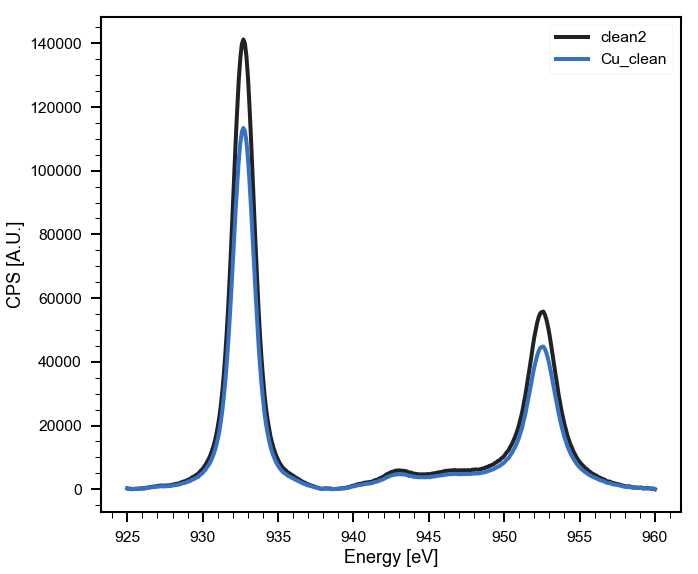

In [54]:
plot_region(clean2, 'Cu_2p')
plot_region(proc_exps[0], 'Cu_2p')

# plt.gca().set(xlim=(960, 925))

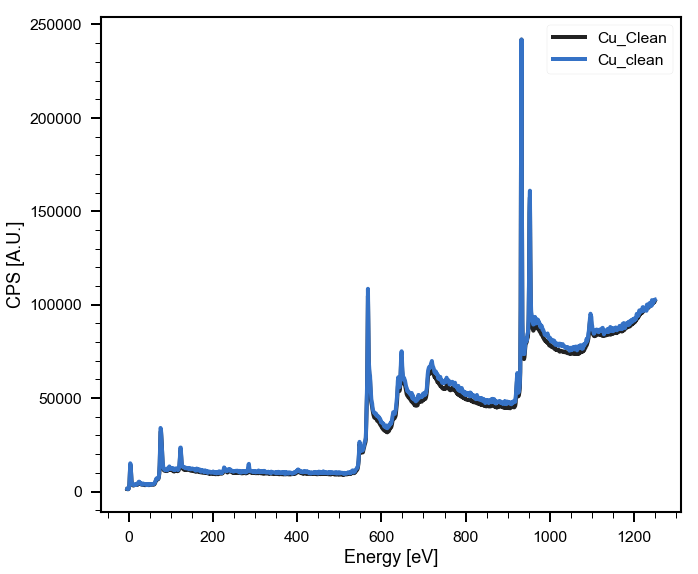

In [48]:
plot_region(clean2, 'Overview_19.0')
plot_region(proc_exps[0], 'Overview_19.0')

# plt.gca().set(xlim=(960, 925))

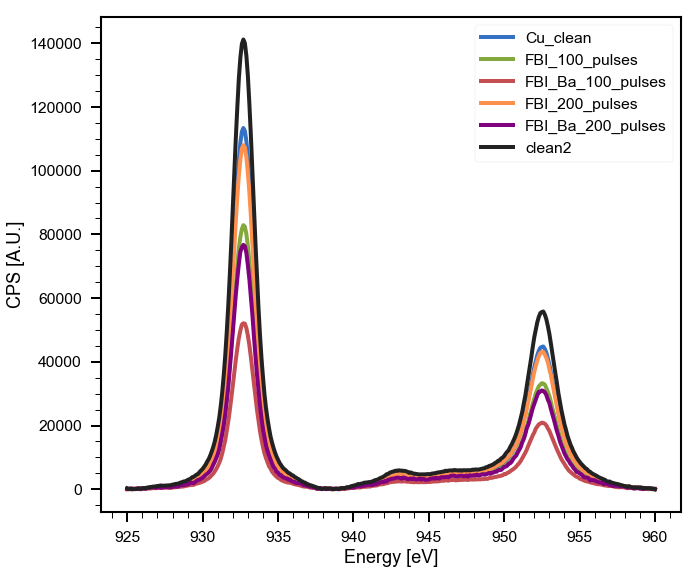

In [55]:
for xp in proc_exps[:5]:
    plot_region(xp, 'Cu_2p')
plot_region(clean2, 'Cu_2p')

In [59]:
clean2.area = {}

In [109]:
proc_exps.pop(-1)

proc_exps.append(clean2)
inds = [[1, 2, 5, 6, 7, 0], [ 3, 4, -1]]
arrange_coverages(proc_exps, inds, r_ml=1.1, region='Cu_2p', mfp=1.84, takeoff=10)

matrix([[5.55886658e-01, 3.05033868e-03],
        [1.20613222e+00, 1.03952334e-02],
        [1.38966268e+00, 1.08009713e-02],
        [1.14520427e+00, 1.02669972e-02],
        [1.02742679e+00, 1.00279093e-02],
        [4.86979342e-01, 1.02651289e-03],
        [9.69731107e-01, 2.25028074e-03]])

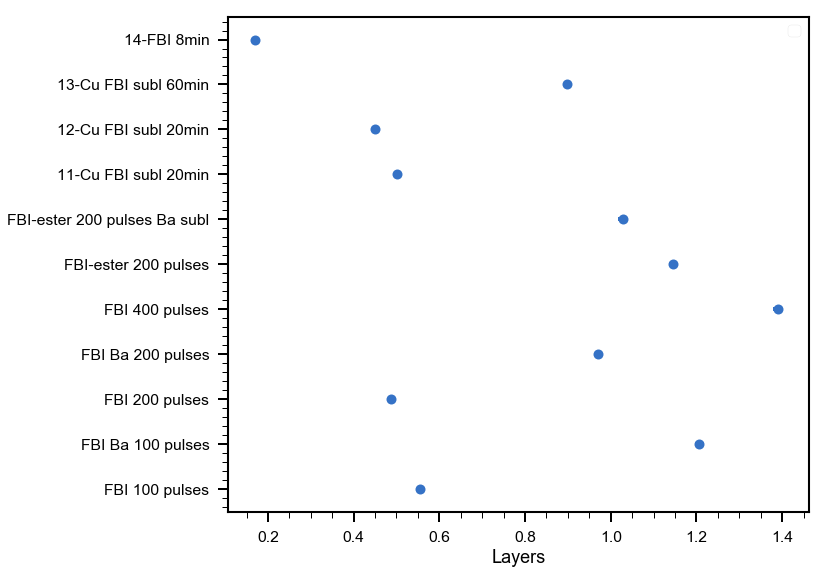

In [110]:
plot_coverages(proc_exps+sublf)

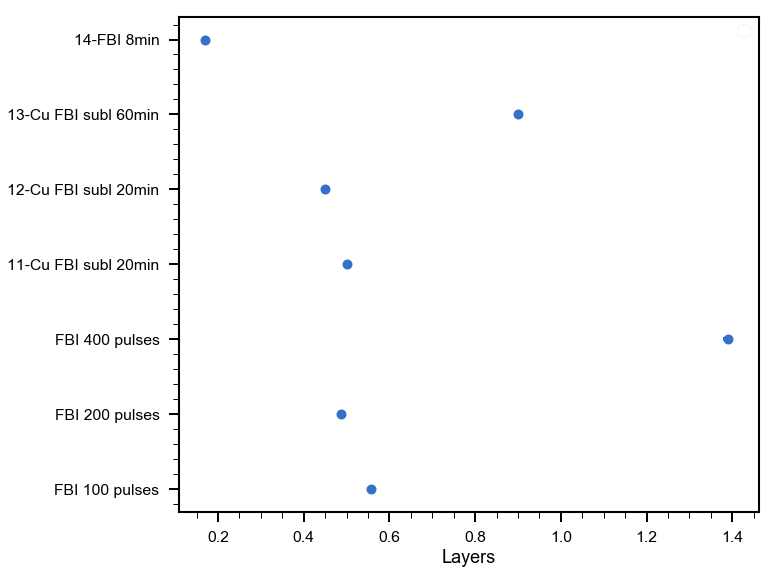

In [111]:
plot_coverages(fexps+sublf)

In [103]:
for xp in proc_exps[1:6]:
    print(xp.name, 'Layers: ', xp.area['layers'])

FBI_100_pulses Layers:  0.7800022475460651
FBI_Ba_100_pulses Layers:  1.861638864798887
FBI_200_pulses Layers:  0.6833137217917552
FBI_Ba_200_pulses Layers:  1.4359715988645827
FBI_400_pulses Layers:  2.144914136175267


In [102]:
for xp in sublf:
    print(xp.name, 'Layers: ', xp.area['layers'])

11-Cu_FBI_subl_20min Layers:  0.5011053158895734
12-Cu_FBI_subl_20min Layers:  0.44898825976914586
13-Cu_FBI_subl_60min Layers:  0.899023390302803
14-FBI 8min Layers:  0.16977673887965156


### Molecular density

In [75]:
from invisible_cities.core.system_of_units import nm

In [112]:
for xp in fexps:
    print(xp.name, ': %.1e ± %.1e molec/mm2' %fbi_n_density((xp.area['layers']*1.1, xp.area['dlayers']*1.1)) )

FBI_100_pulses : 1.4e+12 ± 7.9e+09 molec/mm2
FBI_200_pulses : 1.3e+12 ± 2.7e+09 molec/mm2
FBI_400_pulses : 3.6e+12 ± 2.8e+10 molec/mm2


In [117]:
for xp in fexps:
    print(xp.name, xp.area['layers'], xp.area['dlayers'])

FBI_100_pulses 0.5558866580002537 0.00305033867922462
FBI_200_pulses 0.486979341876962 0.0010265128918224814
FBI_400_pulses 1.389662679775525 0.010800971293376833


In [114]:
inds = [[11, 13],]
arrange_coverages(subl_exps, inds, r_ml=1.1, region='Cu_2p', mfp=1.84, takeoff=10)

matrix([[0.12099532, 0.00028673]])

## Store data

In [115]:
for xp in proc_exps:
    write_processed_xp(xp.path, xp)

In [116]:
for xp in proc_exps:
    write_processed_xp(xp.path, xp)

# Compare to sublimation

In [62]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02*/**/*.uxy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []

for f in files:
    if ('/proc' in f):
        files_new.append(f)
files = files_new

subl_exps = []
for f in files:
    subl_exps.append(read_processed_xp(f))

[xp.name for xp in subl_exps]

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_05_Cu/proc/20210205_14-Cu_FBI_subl_8min_BaCl2_1min.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2021_02_05_Cu/proc/20210205_14-Cu_clean2.uxy.ft', returning empty fit dict


['11-Cu_FBI_subl_20min',
 '11-Cu_FBI_subl_20min_BaCl2_2min',
 '11-Cu_clean',
 '12-Cu_FBI_subl_20min',
 '12-Cu_FBI_subl_20min_BaCl2_4min',
 '12-Cu_clean',
 '13-Cu_FBI_subl_60min',
 '13-Cu_FBI_subl_60min_BaCl2_4min',
 '13-Cu_FBI_subl_60min_BaCl2_8min',
 '13-Cu_FBI_subl_60min_BaCl2_12min',
 '13-Cu_clean',
 '14-FBI 8min',
 '14-FBI 8min, BaCl$_2$ 1min',
 '14-Cu_clean2']

In [64]:
[xp.name for xp in subl_exps]
sublf = [subl_exps[i] for i in [0, 3, 6, 11]]
sublfb = [subl_exps[i] for i in [1, 4, 7, 8, 9, 10, 11]]

In [155]:
trim_spectra(fexps[2], subl_exps[1], 'Cu_2p', inplace=True);

In [170]:
trim_spectra(fexps[2], sublf[1], 'Cl_2p', inplace=True);

In [171]:
trim_spectra(fexps[2], sublf[1], 'Ba_3d', inplace=True);

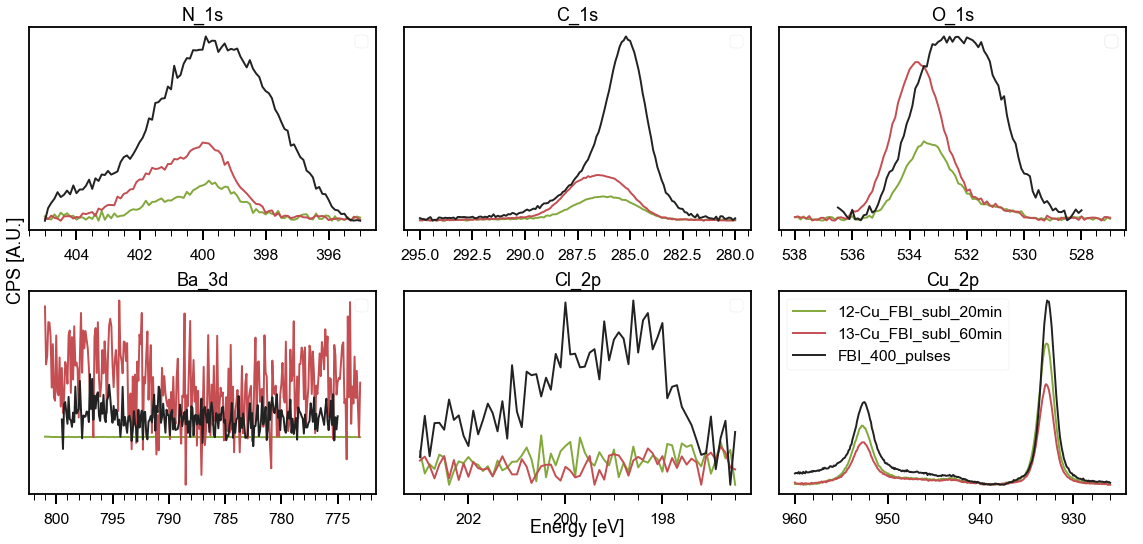

In [172]:
plot_xp_regions(sublf[1:3] + [fexps[2]], regions);

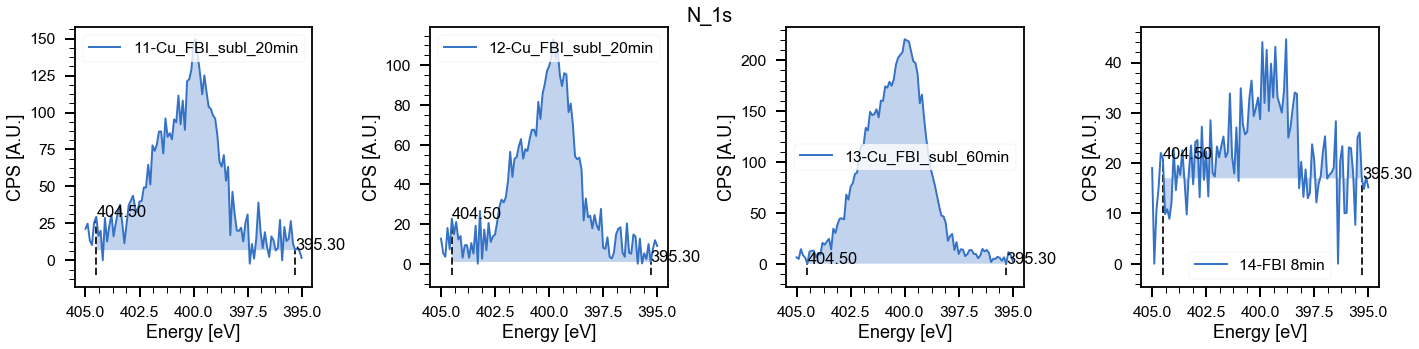

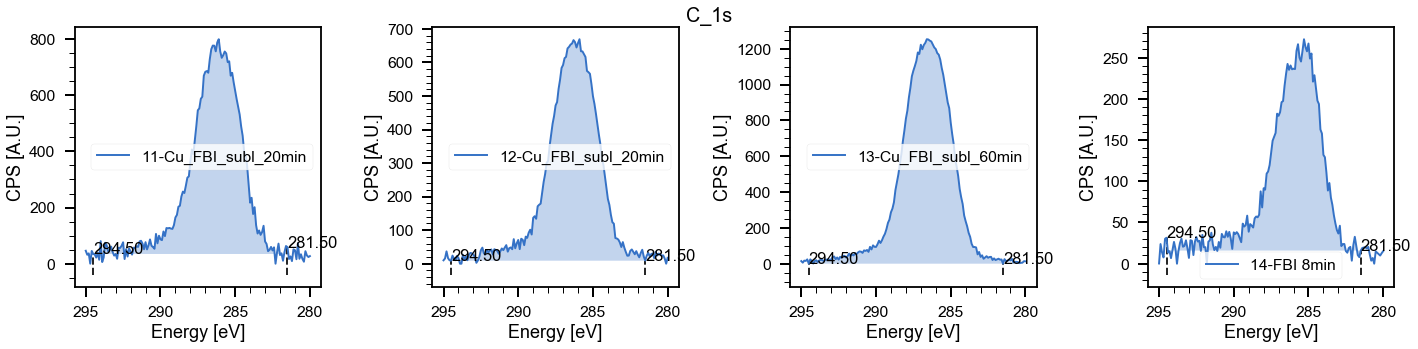

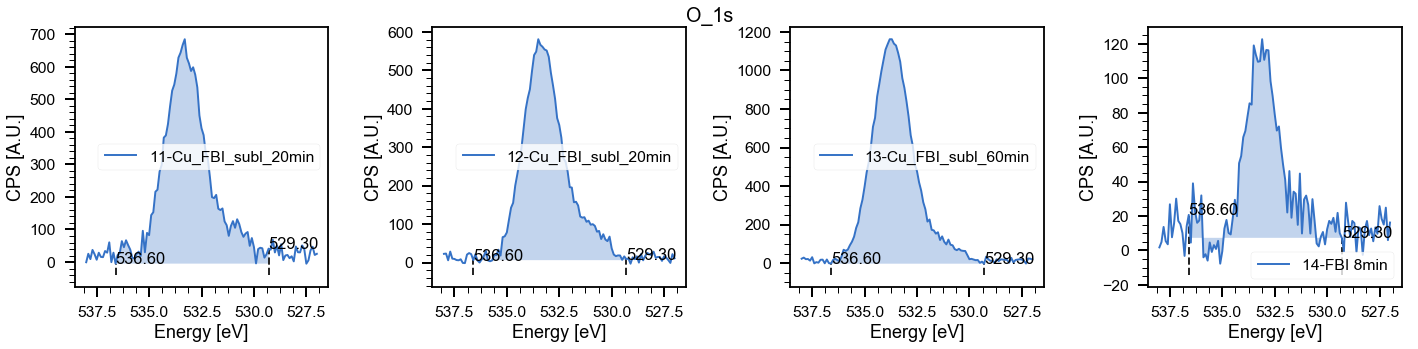

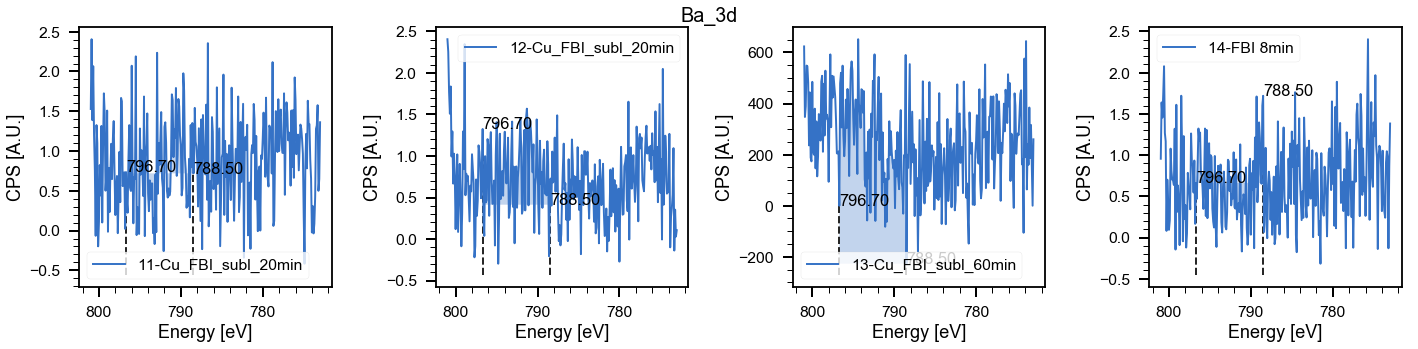

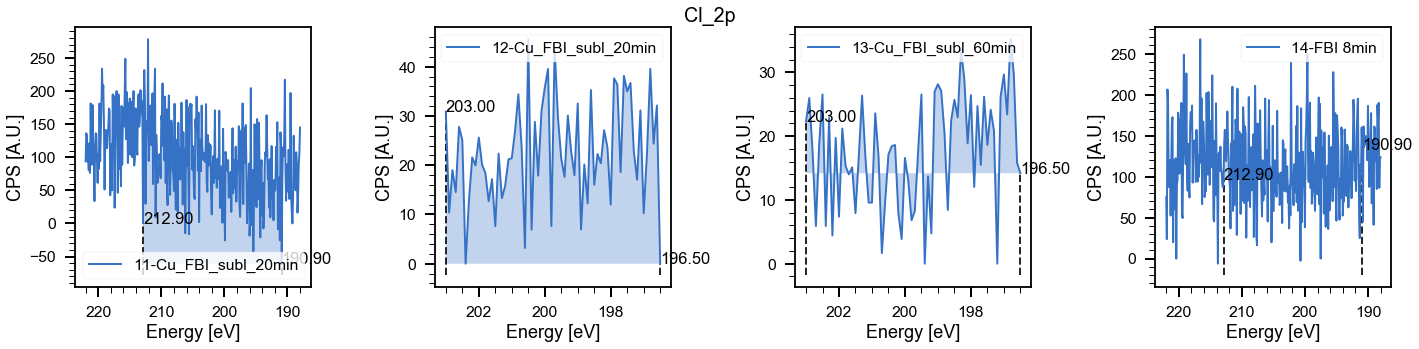

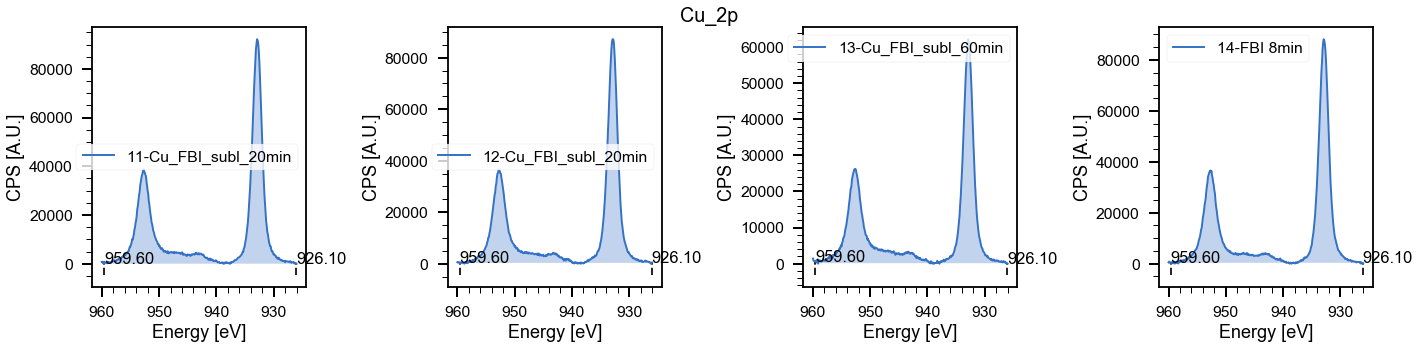

In [122]:
for r in regions:
    integrateRegions(sublf, region=r, asf=asf)

In [123]:
num, denom = (('N_1s', 'C_1s', 'C_1s'), ('O_1s', 'N_1s', 'O_1s'))
display_stoichiometry(sublf + [stofbi], num, denom)

In [68]:
for xp in sublf[:-1]:
    print(xp.area['layers'])

0.5011053158895734
0.44898825976914586
0.899023390302803
